In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [14]:
places_df1 = pd.read_csv('places_include_distance.csv')
places_df2 = pd.read_csv('places_include_distance2.csv')
places_df = pd.concat([places_df1, places_df2], ignore_index=True)
places_df

,country,geometry,icon,id,ikea_address,ikea_location,ikea_place_id,ikea_rating,ikea_user_ratings_total,name,...,price_level,rating,reference,scope,type,types,user_ratings_total,vicinity,distance_to_ikea,duration_to_ikea
0,the Netherlands,"{'location': {'lat': 52.0097797, 'lng': 4.3917...",https://maps.gstatic.com/mapfiles/place_api/ic...,ae42128f873d1ed433826e1377ccdcb677c69e11,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Taste Coffee,...,NaN,4.0,ChIJ840zcgnKxUcRNetK2uHnSww,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",2.0,"Graaf Willem II Laan 8, Delfgauw",2646,360
1,the Netherlands,"{'location': {'lat': 52.01090180000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,72e194fe338e76aa519c7e33538930ecc700a487,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,De Nieuwe Prins,...,2.0,4.4,ChIJo88kSOm1xUcRlWe3_K81oY4,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,"Oosteinde 1-3, Delft",2227,410
2,the Netherlands,"{'location': {'lat': 52.0065033, 'lng': 4.3716...",https://maps.gstatic.com/mapfiles/place_api/ic...,0e1663ff496c39cfe6bc494abcb7ac619a53024d,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,the Bouwpub,...,1.0,4.6,ChIJw-2iwey1xUcReprW4owZ3u8,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",220.0,"Julianalaan 134, Delft",1745,337
3,the Netherlands,"{'location': {'lat': 52.006248, 'lng': 4.37133...",https://maps.gstatic.com/mapfiles/place_api/ic...,bba642eb2e52acc2b1adf919d1289f9f6b36933c,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Espressobar Vascobello,...,NaN,3.0,ChIJEeM9A-21xUcRfOy3s3W8c6w,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",6.0,"Zuidplantsoen 6, Delft",1722,329
4,the Netherlands,"{'location': {'lat': 52.0130013, 'lng': 4.3656...",https://maps.gstatic.com/mapfiles/place_api/ic...,92c58753b772dff36d9bc255d2cd92a3b0caa4a1,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Café 1Eighty,...,NaN,4.1,ChIJExYA-Oi1xUcRejXJldLWnbY,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,"Oranje Plantage 19, Delft",1870,331
5,the Netherlands,"{'location': {'lat': 52.0138188, 'lng': 4.3648...",https://maps.gstatic.com/mapfiles/place_api/ic...,a3533c8e702b7b248dfec42c4b6cca06ae985945,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Miss Morrison - Koffiebranderij Delft,...,NaN,NaN,ChIJGUUHHPK1xUcRgdSW-txMHB4,GOOGLE,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",NaN,Netherlands,2290,446
6,the Netherlands,"{'location': {'lat': 52.02091559999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,746b15fb36327be60c9916e79c6c54359410fb12,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Knus,...,NaN,4.1,ChIJWfSP5OO1xUcRUNNGklF9wrc,GOOGLE,cafe,"['cafe', 'store', 'restaurant', 'point_of_inte...",247.0,"Zavelpad 3, Delft",2803,477
7,the Netherlands,"{'location': {'lat': 52.01386000000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,4b92aa24a0a5ed8d870a7df0e572c8887ac551c6,"Olof Palmestraat 1, 2616 LN Delft, Netherlands","{'lat': 52.01298449999999, 'lng': 4.3815153}",ChIJo6I07vC1xUcRZA27z1-1Q1c,4.2,11969,Cafe de Koepoort en Ko,...,NaN,4.3,ChIJo-uRaei1xUcR6HhZSDQ-5Vs,GOOGLE,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",35.0,"Oosterstraat 2, Delft",1795,313
8,the Netherlands,"{'location': {'lat': 52.0049343, 'lng': 4.3927...",https://maps.gstatic.com/mapfiles/place_api/ic...,a635b6416a2f3420a4e88c

In [15]:
places_df.columns

Index(['country', 'geometry', 'icon', 'id', 'ikea_address', 'ikea_location',
       'ikea_place_id', 'ikea_rating', 'ikea_user_ratings_total', 'name',
       'opening_hours', 'photos', 'place_id', 'plus_code', 'price_level',
       'rating', 'reference', 'scope', 'type', 'types', 'user_ratings_total',
       'vicinity', 'distance_to_ikea', 'duration_to_ikea'],
      dtype='object')

In [24]:
places_df = places_df[['country','geometry', 'ikea_rating', 'ikea_user_ratings_total', 'price_level',
       'rating','type', 'types', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']]
places_df

,country,geometry,ikea_rating,ikea_user_ratings_total,price_level,rating,type,types,user_ratings_total,distance_to_ikea,duration_to_ikea
0,the Netherlands,"{'location': {'lat': 52.0097797, 'lng': 4.3917...",4.2,11969,NaN,4.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",2.0,2646,360
1,the Netherlands,"{'location': {'lat': 52.01090180000001, 'lng':...",4.2,11969,2.0,4.4,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,2227,410
2,the Netherlands,"{'location': {'lat': 52.0065033, 'lng': 4.3716...",4.2,11969,1.0,4.6,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",220.0,1745,337
3,the Netherlands,"{'location': {'lat': 52.006248, 'lng': 4.37133...",4.2,11969,NaN,3.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",6.0,1722,329
4,the Netherlands,"{'location': {'lat': 52.0130013, 'lng': 4.3656...",4.2,11969,NaN,4.1,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,1870,331
5,the Netherlands,"{'location': {'lat': 52.0138188, 'lng': 4.3648...",4.2,11969,NaN,NaN,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",NaN,2290,446
6,the Netherlands,"{'location': {'lat': 52.02091559999999, 'lng':...",4.2,11969,NaN,4.1,cafe,"['cafe', 'store', 'restaurant', 'point_of_inte...",247.0,2803,477
7,the Netherlands,"{'location': {'lat': 52.01386000000001, 'lng':...",4.2,11969,NaN,4.3,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",35.0,1795,313
8,the Netherlands,"{'location': {'lat': 52.0049343, 'lng': 4.3927...",4.2,11969,NaN,5.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",1.0,3500,568
9,the Netherlands,"{'location': {'lat': 52.00258119999999, 'lng':...",4.2,11969,NaN,4.5,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",50.0,2567,471


In [29]:
#drop nan in the rating
places_df = places_df.dropna(subset=['rating'])
places_df

,country,geometry,ikea_rating,ikea_user_ratings_total,price_level,rating,type,types,user_ratings_total,distance_to_ikea,duration_to_ikea
0,the Netherlands,"{'location': {'lat': 52.0097797, 'lng': 4.3917...",4.2,11969,NaN,4.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",2.0,2646,360
1,the Netherlands,"{'location': {'lat': 52.01090180000001, 'lng':...",4.2,11969,2.0,4.4,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,2227,410
2,the Netherlands,"{'location': {'lat': 52.0065033, 'lng': 4.3716...",4.2,11969,1.0,4.6,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",220.0,1745,337
3,the Netherlands,"{'location': {'lat': 52.006248, 'lng': 4.37133...",4.2,11969,NaN,3.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",6.0,1722,329
4,the Netherlands,"{'location': {'lat': 52.0130013, 'lng': 4.3656...",4.2,11969,NaN,4.1,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",14.0,1870,331
6,the Netherlands,"{'location': {'lat': 52.02091559999999, 'lng':...",4.2,11969,NaN,4.1,cafe,"['cafe', 'store', 'restaurant', 'point_of_inte...",247.0,2803,477
7,the Netherlands,"{'location': {'lat': 52.01386000000001, 'lng':...",4.2,11969,NaN,4.3,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",35.0,1795,313
8,the Netherlands,"{'location': {'lat': 52.0049343, 'lng': 4.3927...",4.2,11969,NaN,5.0,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",1.0,3500,568
9,the Netherlands,"{'location': {'lat': 52.00258119999999, 'lng':...",4.2,11969,NaN,4.5,cafe,"['cafe', 'store', 'point_of_interest', 'food',...",50.0,2567,471
10,the Netherlands,"{'location': {'lat': 52.01316740000001, 'lng':...",4.2,11969,2.0,4.2,cafe,"['cafe', 'point_of_interest', 'food', 'establi...",34.0,2763,541


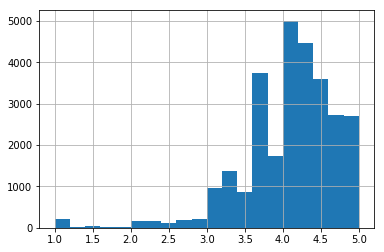

In [30]:
places_df['rating'].hist(bins=20)

In [31]:
places_df.groupby(['country', 'type'])['rating'].count()

country          type          
Australia        bar               281
                 cafe              407
                 clothing_store    309
                 restaurant        353
Belgium          bar               212
                 cafe              260
                 clothing_store    251
                 restaurant        282
Canada           bar               594
                 cafe              708
                 clothing_store    683
                 restaurant        696
France           bar               566
                 cafe              657
                 clothing_store    622
                 restaurant        685
Germany          bar               609
                 cafe              716
                 clothing_store    548
                 restaurant        689
Hong Kong        bar               167
                 cafe              163
                 clothing_store     80
                 restaurant        169
Italy            bar            

In [32]:
places_df.groupby(['country', 'type'])['rating'].mean()

country          type          
Australia        bar               4.111388
                 cafe              4.074447
                 clothing_store    4.064725
                 restaurant        3.953541
Belgium          bar               4.128774
                 cafe              4.105769
                 clothing_store    4.115538
                 restaurant        4.097163
Canada           bar               4.077946
                 cafe              3.987429
                 clothing_store    4.086530
                 restaurant        4.001868
France           bar               4.069965
                 cafe              4.081279
                 clothing_store    3.911093
                 restaurant        3.875766
Germany          bar               4.276355
                 cafe              4.210615
                 clothing_store    4.241788
                 restaurant        4.101597
Hong Kong        bar               3.912575
                 cafe              3.816564


In [33]:
places_df.groupby(['type'])['rating'].mean()

type
bar               4.122060
cafe              4.097784
clothing_store    4.087210
restaurant        3.954816
Name: rating, dtype: float64

In [48]:
places_df.groupby(['country'])['ikea_user_ratings_total'].mean()

country
Australia           2928.204444
Belgium             4142.678607
Canada              4811.200298
France              4914.889328
Germany             4709.719360
Hong Kong           1595.651123
Italy               7860.109098
Japan               4168.835971
Poland              6419.874825
Spain               5927.921546
Sweden              3304.934722
Taiwan             10980.628253
Turkey              5610.434836
the Netherlands     5779.224332
the UK              5117.003442
the US              5372.761410
Name: ikea_user_ratings_total, dtype: float64

In [ ]:
places_df.groupby(['country'])['rating'].mean()

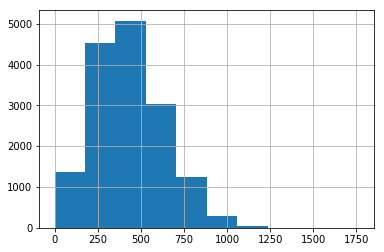

In [13]:
places_df['duration_to_ikea'].hist()

In [36]:
modeling_data = places_df[['country', 'ikea_rating', 'ikea_user_ratings_total', 'price_level',
       'rating','type', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']]
#modeling_data

,country,ikea_rating,ikea_user_ratings_total,price_level,rating,type,user_ratings_total,distance_to_ikea,duration_to_ikea
0,the Netherlands,4.2,11969,NaN,4.0,cafe,2.0,2646,360
1,the Netherlands,4.2,11969,2.0,4.4,cafe,14.0,2227,410
2,the Netherlands,4.2,11969,1.0,4.6,cafe,220.0,1745,337
3,the Netherlands,4.2,11969,NaN,3.0,cafe,6.0,1722,329
4,the Netherlands,4.2,11969,NaN,4.1,cafe,14.0,1870,331
6,the Netherlands,4.2,11969,NaN,4.1,cafe,247.0,2803,477
7,the Netherlands,4.2,11969,NaN,4.3,cafe,35.0,1795,313
8,the Netherlands,4.2,11969,NaN,5.0,cafe,1.0,3500,568
9,the Netherlands,4.2,11969,NaN,4.5,cafe,50.0,2567,471
10,the Netherlands,4.2,11969,2.0,4.2,cafe,34.0,2763,541


## feature embedding 

In [136]:
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def oneHotEncoding(dataframe, column_name):
    values = dataframe[column_name].values
    
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [188]:
type_onehot_encoded = oneHotEncoding(modeling_data, 'type')

/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [189]:
country_onehot_encoded = oneHotEncoding(modeling_data, 'country')
country_onehot_encoded

/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## TO DO: scale the feature by country/type

In [96]:
modeling_data['mean_rating_by_country'] = modeling_data.groupby(['country'])['rating'].transform(np.mean)
modeling_data['mean_rating_by_country_type'] = modeling_data.groupby(['country', 'type'])['rating'].transform(np.mean)
modeling_data

,country,ikea_rating,ikea_user_ratings_total,price_level,rating,type,user_ratings_total,distance_to_ikea,duration_to_ikea,mean_rating_by_country,mean_rating_by_country_type
0,the Netherlands,4.2,11969,NaN,4.0,cafe,2.0,2646,360,4.239873,4.252632
1,the Netherlands,4.2,11969,2.0,4.4,cafe,14.0,2227,410,4.239873,4.252632
2,the Netherlands,4.2,11969,1.0,4.6,cafe,220.0,1745,337,4.239873,4.252632
3,the Netherlands,4.2,11969,NaN,3.0,cafe,6.0,1722,329,4.239873,4.252632
4,the Netherlands,4.2,11969,NaN,4.1,cafe,14.0,1870,331,4.239873,4.252632
6,the Netherlands,4.2,11969,NaN,4.1,cafe,247.0,2803,477,4.239873,4.252632
7,the Netherlands,4.2,11969,NaN,4.3,cafe,35.0,1795,313,4.239873,4.252632
8,the Netherlands,4.2,11969,NaN,5.0,cafe,1.0,3500,568,4.239873,4.252632
9,the Netherlands,4.2,11969,NaN,4.5,cafe,50.0,2567,471,4.239873,4.252632
10,the Netherlands,4.2,11969,2.0,4.2,cafe,34.0,2763,541,4.239873,4.252632


In [97]:
for column in modeling_data.columns:
    print(column, len(modeling_data[modeling_data[column].isna()]))

country 0
ikea_rating 0
ikea_user_ratings_total 0
price_level 17377
rating 0
type 0
user_ratings_total 0
distance_to_ikea 0
duration_to_ikea 0
mean_rating_by_country 0
mean_rating_by_country_type 0


In [190]:
data_x = modeling_data[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating', 'ikea_user_ratings_total',
                               'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = modeling_data['rating'].values
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(28306, 27) (28306,)


array([[4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [191]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(22644, 27) (5662, 27)


## Linear regression

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))


0.04923553232290501
[-1.30304112e-03  9.64386162e-01  1.21768121e-02 -4.38314516e-06
  9.35311227e-06  3.31354714e-06  1.12561077e-04 -1.43882983e-02
 -7.42208531e-03  1.63707441e-02  5.43963951e-03 -2.26738710e-03
 -1.21320681e-02 -8.62621999e-03 -1.96368660e-02 -1.79322377e-02
 -1.67990166e-02  1.25570947e-02  1.26761749e-02 -6.31848657e-03
 -1.20767745e-03 -1.42175973e-02  7.06947574e-02  2.77677003e-02
 -1.37067889e-02 -4.13761291e-03 -6.71376888e-03]
0.07076012504514217
Linear regression MSE for the testing set 0.4132951776742655


In [193]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(lasso_reg.score(x_train,y_train))
print(lasso_reg.coef_)
print(lasso_reg.intercept_) 

y_predict = lasso_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.00896373339630474
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.53110298e-06
  7.62339227e-07  5.77560818e-06  2.16397207e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
3.9435110522185544
Linear regression MSE for the testing set 0.43188194136320834


In [151]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.4202513587265988
Mean value by Counrty and Type MSE for the testing set 0.41316227784199316


In [152]:
list(linear_reg.coef_)

[-0.0013030411179887904,
 0.9643861617136018,
 0.01217681214552558,
 -4.383145157796058e-06,
 9.353112272839004e-06,
 3.313547139469249e-06,
 0.00011256107676381283,
 -0.01438829832461979,
 -0.007422085306376896,
 0.016370744123541045,
 0.005439639507454611,
 -0.0022673871006586026,
 -0.012132068059312988,
 -0.008626219992306217,
 -0.01963686595726849,
 -0.017932237694126985,
 -0.016799016550829833,
 0.012557094715007164,
 0.012676174910407583,
 -0.00631848657042045,
 -0.0012076774456772782,
 -0.014217597279919048,
 0.07069475740412595,
 0.027767700295573402,
 -0.013706788893560608,
 -0.0041376129052477055,
 -0.00671376887576356]

In [118]:
len(linear_reg.coef_)

27

## Only include data with price rating

In [111]:
data_with_pricerate = modeling_data[modeling_data['price_level'].notna()]
data_with_pricerate

,country,ikea_rating,ikea_user_ratings_total,price_level,rating,type,user_ratings_total,distance_to_ikea,duration_to_ikea,mean_rating_by_country,mean_rating_by_country_type
1,the Netherlands,4.2,11969,2.0,4.4,cafe,14.0,2227,410,4.239873,4.252632
2,the Netherlands,4.2,11969,1.0,4.6,cafe,220.0,1745,337,4.239873,4.252632
10,the Netherlands,4.2,11969,2.0,4.2,cafe,34.0,2763,541,4.239873,4.252632
14,the Netherlands,4.2,11969,2.0,4.4,cafe,738.0,2643,528,4.239873,4.252632
15,the Netherlands,4.2,11969,2.0,4.3,cafe,230.0,3470,807,4.239873,4.252632
16,the Netherlands,4.2,11969,2.0,4.6,cafe,146.0,1987,360,4.239873,4.252632
17,the Netherlands,4.2,11969,2.0,4.2,cafe,351.0,6611,702,4.239873,4.252632
22,the Netherlands,4.2,11969,2.0,4.4,cafe,214.0,3248,715,4.239873,4.252632
23,the Netherlands,4.2,11969,1.0,4.6,cafe,23.0,2196,415,4.239873,4.252632
24,the Netherlands,4.2,11969,2.0,3.9,cafe,138.0,2431,412,4.239873,4.252632


In [175]:
data_x = data_with_pricerate[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                               'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = data_with_pricerate['rating'].values

type_onehot_encoded = oneHotEncoding(data_with_pricerate, 'type')
country_onehot_encoded = oneHotEncoding(data_with_pricerate, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10929, 27) (10929,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [176]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8743, 27) (2186, 27)


In [177]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.10243446696419556
[ 9.43863528e-03  9.68640256e-01  1.32467949e-02  2.34376540e-02
 -8.12392733e-06  1.82531585e-06  5.47529509e-05  6.10811489e-02
  7.70244259e-03 -1.13357568e-01  4.45739763e-02 -1.94514481e-02
 -1.02640599e-02 -5.04496811e-02 -7.90617818e-03 -6.29314366e-03
 -6.26878343e-02  4.89744688e-02  5.72999032e-02  8.72065942e-02
  5.49860066e-02 -5.21707314e-03 -2.17573036e-02 -6.10266650e-02
 -1.83529662e-02  1.48248668e-03  1.34568938e-02]
-0.08941890560676047
Linear regression MSE for the testing set 0.19932856815946515


In [186]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(lasso_reg.score(x_train,y_train))
print(lasso_reg.coef_)
print(lasso_reg.intercept_) 

y_predict = lasso_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.016839526921241244
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.98577527e-06  1.41574870e-06  2.64754457e-04  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
3.9097327043271117
Linear regression MSE for the testing set 0.21217576825531237


In [183]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.21069786360721446
Mean value by Counrty and Type MSE for the testing set 0.20278682101338946


## Model stores have more than certain reviews

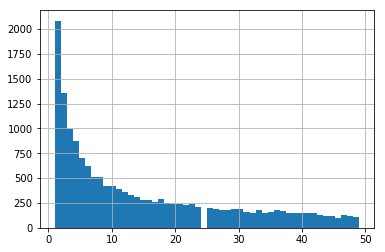

In [212]:
modeling_data[modeling_data['user_ratings_total']<50]['user_ratings_total'].hist(bins=50)

In [355]:
print("Total entry", len(modeling_data))
above_number_rating = modeling_data[(modeling_data['user_ratings_total']>10)]
#above_number_rating['mean_rating_by_country'] = above_number_rating.groupby(['country'])['rating'].transform(np.mean)
#above_number_rating['mean_rating_by_country_type'] = above_number_rating.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating)

Total entry 28306


19807

In [356]:
data_x = above_number_rating[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(19807, 26) (19807,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.13406814, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [357]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(15845, 26) (3962, 26)


In [358]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.08169831295142428
[ 2.48537971e-02  7.90354794e-01  1.03469666e-02  8.38396298e-07
  6.43331221e-06  3.26840742e-05  2.19016502e-02  9.92846328e-03
 -3.08959193e-02 -9.34194166e-04 -3.10172298e-02 -1.00990940e-02
 -2.32839975e-02 -1.27922133e-02  1.60948934e-03 -7.79363630e-02
  2.09343401e-02 -2.41840951e-02  5.47506777e-02  1.33962676e-02
 -7.33165341e-04  2.26016617e-02  6.61786494e-02 -1.35787392e-02
 -1.83840217e-03  1.59922137e-02]
0.6695459242645692
Linear regression MSE for the testing set 0.19077663025010197


In [359]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.19970842463559052
Mean value by Counrty and Type MSE for the testing set 0.1906952048497819


## number of ratings above threshold and have price level

In [360]:
print("Total entry", len(modeling_data))
above_number_rating_pricelevel = modeling_data[(modeling_data['user_ratings_total']>10) & (modeling_data['price_level'].notna())]
#above_number_rating_pricelevel['mean_rating_by_country'] = above_number_rating_pricelevel.groupby(['country'])['rating'].transform(np.mean)
#above_number_rating_pricelevel['mean_rating_by_country_type'] = above_number_rating_pricelevel.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating_pricelevel)

Total entry 28306


10297

In [361]:
data_x = above_number_rating_pricelevel[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating_pricelevel['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10297, 27) (10297,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [362]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8237, 27) (2060, 27)


In [363]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
y_train_predict = linear_reg.predict(x_train)
print("Predicted MSE for training data: ", mean_squared_error(y_train, y_train_predict))
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.11905446589182223
[ 3.92584373e-02  8.19694054e-01  8.97162760e-03  4.86918490e-02
 -2.97837555e-05  2.78983369e-06  4.27961589e-05  6.76007888e-02
  2.05794529e-02 -1.20765434e-01  3.25851928e-02 -4.09764296e-02
  1.53253734e-03 -6.06573333e-02 -2.56060169e-02  1.00008225e-02
 -5.28680237e-02  8.75482124e-02 -3.91680926e-02  9.71438386e-02
  5.85287913e-02 -3.67758792e-02 -4.08975731e-02  6.07596333e-03
  3.26105182e-03  9.63591039e-03  2.32222209e-02]
0.3852093925684237
Predicted MSE for training data:  0.1535749051426595
Linear regression MSE for the testing set 0.15263204490537283


In [364]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.15820930821616125
Mean value by Counrty and Type MSE for the testing set 0.1526659383377838


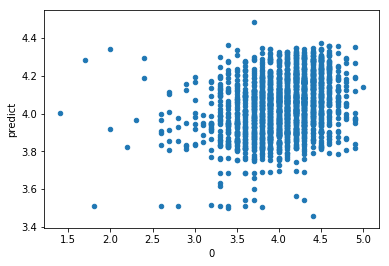

In [345]:
df = pd.DataFrame(y_test.T)
df['predict'] = pd.Series(y_predict)
df.plot.scatter(x=0, y='predict')

## above number of rating, have price level, rating above 3

In [365]:
print("Total entry", len(modeling_data))
above_number_rating_pricelevel = modeling_data[(modeling_data['user_ratings_total']>10) & (modeling_data['price_level'].notna())& (modeling_data['rating']>3)]
#above_number_rating_pricelevel['mean_rating_by_country'] = above_number_rating_pricelevel.groupby(['country'])['rating'].transform(np.mean)
#above_number_rating_pricelevel['mean_rating_by_country_type'] = above_number_rating_pricelevel.groupby(['country', 'type'])['rating'].transform(np.mean)
len(above_number_rating_pricelevel)

Total entry 28306


10081

In [366]:
data_x = above_number_rating_pricelevel[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level', 'user_ratings_total','distance_to_ikea', 'duration_to_ikea']].values
data_y = above_number_rating_pricelevel['rating'].values

type_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'type')
country_onehot_encoded = oneHotEncoding(above_number_rating_pricelevel, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

(10081, 27) (10081,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warnin

array([[4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.23987342, 4.25263158, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.14021485, 4.17153996, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [367]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8064, 27) (2017, 27)


In [368]:
linear_reg = LinearRegression(normalize=False)
linear_reg.fit(x_train, y_train)
#linear_reg.fit(x_train, y_train)
print(linear_reg.score(x_train,y_train))
print(linear_reg.coef_)
print(linear_reg.intercept_) 

y_predict = linear_reg.predict(x_test)
y_train_predict = linear_reg.predict(x_train)
print("Predicted MSE for training data: ", mean_squared_error(y_train, y_train_predict))
print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

0.12094773014700355
[ 5.33813863e-02  6.85470127e-01  1.28787282e-02  2.85598295e-02
 -4.70418018e-05  2.86571160e-06  6.23383076e-05  4.44870607e-02
  2.04281866e-02 -9.18600479e-02  2.69448006e-02 -3.26118491e-02
  1.79220765e-02 -3.71879197e-02 -3.65193294e-02  1.41017024e-02
 -5.80169169e-02  5.39384447e-02 -7.32374355e-02  8.47187348e-02
  4.68459241e-02 -5.70327263e-02  8.94708583e-03  2.33561590e-02
 -4.66792486e-03 -6.85295327e-03  5.62969276e-02]
0.9165326113224519
Predicted MSE for training data:  0.11620706911000173
Linear regression MSE for the testing set 0.11842908222701579


In [369]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.12609661757948187
Mean value by Counrty and Type MSE for the testing set 0.12218558255232054


## KNN regressor

In [ ]:
# print("Total entry", len(modeling_data))
# above_number_rating = modeling_data[modeling_data['user_ratings_total']>10]
# above_number_rating['mean_rating_by_country'] = above_number_rating.groupby(['country'])['rating'].transform(np.mean)
# above_number_rating['mean_rating_by_country_type'] = above_number_rating.groupby(['country', 'type'])['rating'].transform(np.mean)
# len(above_number_rating)

In [284]:
modeling_data.columns

Index(['country', 'ikea_rating', 'ikea_user_ratings_total', 'price_level',
       'rating', 'type', 'user_ratings_total', 'distance_to_ikea',
       'duration_to_ikea', 'mean_rating_by_country',
       'mean_rating_by_country_type'],
      dtype='object')

In [285]:
data_with_pricerate = modeling_data[modeling_data['price_level'].notna()]
data_with_pricerate['mean_rating_by_country'] = data_with_pricerate.groupby(['country'])['rating'].transform(np.mean)
data_with_pricerate['mean_rating_by_country_type'] = data_with_pricerate.groupby(['country', 'type'])['rating'].transform(np.mean)

data_x = data_with_pricerate[['mean_rating_by_country', 'mean_rating_by_country_type', 'ikea_rating',
                                'price_level','user_ratings_total','distance_to_ikea']].values
data_y = data_with_pricerate['rating'].values

type_onehot_encoded = oneHotEncoding(data_with_pricerate, 'type')
country_onehot_encoded = oneHotEncoding(data_with_pricerate, 'country')
data_x = np.concatenate([data_x, type_onehot_encoded, country_onehot_encoded], axis=1)
print(data_x.shape, data_y.shape)
data_x

/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(10929, 26) (10929,)


/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/quest-admin/anaconda3/envs/python35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the O

array([[4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       [4.21461717, 4.28444444, 4.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ],
       [4.1952862 , 4.31529412, 2.9       , ..., 0.        , 0.        ,
        0.        ]])

In [286]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

mean_by_country_train = x_train[:,0]
mean_by_country_type_train = x_train[:,1]

mean_by_country_test = x_test[:,0]
mean_by_country_type_test = x_test[:,1]

#x_train = np.delete(x_train, [0, 1], 1)
#x_test = np.delete(x_test, [0, 1], 1)

print(x_train.shape, x_test.shape)

(8743, 26) (2186, 26)


In [287]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train) 

y_predict = knn_reg.predict(x_test)

print("Linear regression MSE for the testing set", mean_squared_error(y_test, y_predict))

Linear regression MSE for the testing set 0.2443174748398902


In [288]:
print("Mean value by Counrty MSE for the testing set", mean_squared_error(y_test, mean_by_country_test))
print("Mean value by Counrty and Type MSE for the testing set", mean_squared_error(y_test, mean_by_country_type_test))

Mean value by Counrty MSE for the testing set 0.2070359704374252
Mean value by Counrty and Type MSE for the testing set 0.19677397409176312


In [289]:
mean_squared_error(y_train, mean_by_country_train)

0.19449123089326806

In [290]:
mean_squared_error(y_train, mean_by_country_type_train)

0.18366370889853825

In [291]:
y_predict = knn_reg.predict(x_train)
mean_squared_error(y_train, y_predict)

0.1548160128102482